Deep Boltzmann Machines
=======================

In [9]:
# !pip install nose
# !pip install tensorflow-addons
# !rm -rf boltzmann-machines
# !git clone --single-branch --depth=1 --branch experimental-tf2 https://github.com/hannesdm/boltzmann-machines.git
# %cd ./boltzmann-machines
from pathlib import Path
import numpy as np
import copy
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['axes.grid'] = False
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

# from boltz.examples import callable_dbm_mnist
from keras.datasets import mnist
from sklearn.neural_network import BernoulliRBM
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from boltzmann_machines import DBM
from boltzmann_machines.rbm import BernoulliRBM
from boltzmann_machines.utils import im_plot

FIGURE_PATH = Path("../report/figures")

Load the MNIST Dataset
----------------------

In [10]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0],-1))
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

Load a Pretrained Model and Visualize the Components
----------------------------------------------------
To prevent losing too much time on training a deep model, a working pretrained RBM will be used.
Can you explain the difference between the components of the first and second layer of the DBM?


In [11]:
rbm1 = BernoulliRBM.load_model('./models/dbm_mnist_rbm1/')
rbm2 = BernoulliRBM.load_model('./models/dbm_mnist_rbm2/')
dbm = DBM.load_model('./models/dbm_mnist/')
dbm.load_rbms([rbm1, rbm2])

c:\Git\kul-anndl-ss24\.venv\Lib\site-packages\tensorflow\python\summary\summary.py:834: UserWarning: Cannot activate TF2 compatibility support for TF1 summary ops: default summary writer not found.
  warnings.warn(


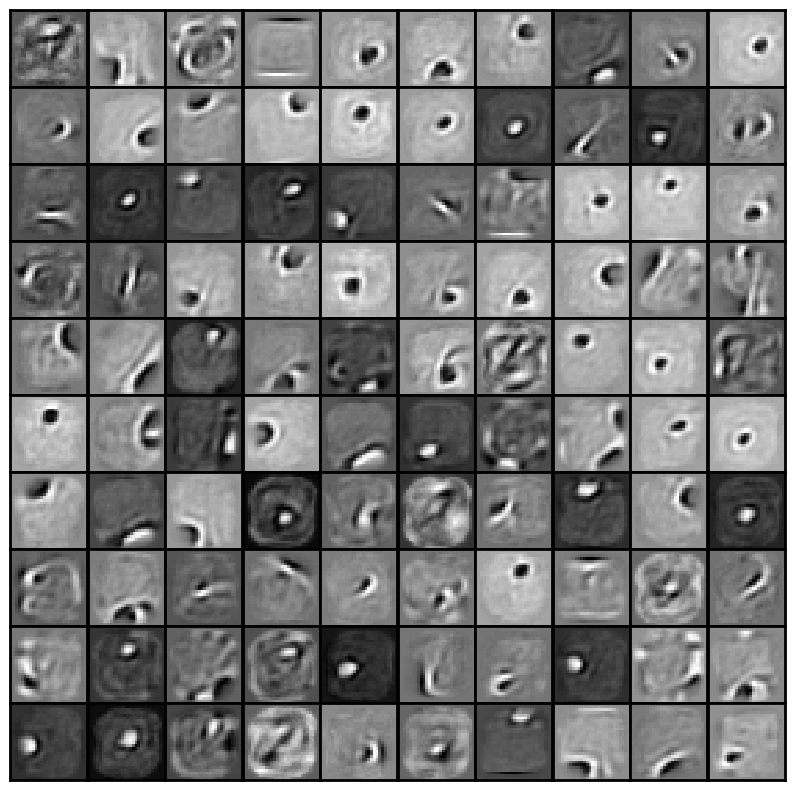

In [17]:
import tensorflow as tf
W1_joint = dbm._W[0].value().numpy()

fig = plt.figure(figsize=(10, 10))
im_plot(W1_joint.T, shape=(28, 28), title='First 100 filters of the first layer of the DBM',
        title_params={'fontsize': 20}, imshow_params={'cmap': plt.cm.gray})
plt.suptitle(None)
plt.savefig(FIGURE_PATH / "ex4_1_dbm_components_1.pdf", bbox_inches='tight')

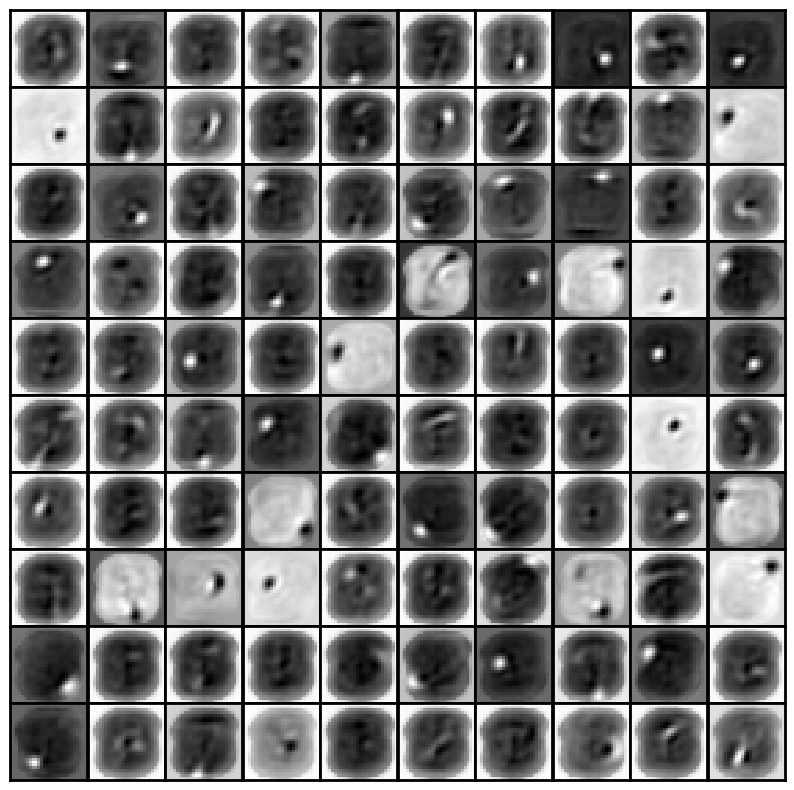

In [13]:
W2_joint = dbm._W[1].value().numpy()
U_joint = W1_joint.dot(W2_joint)

fig = plt.figure(figsize=(10, 10))
im_plot(U_joint.T, shape=(28, 28), title='First 100 filters of the 2nd layer of the DBM',
        title_params={'fontsize': 20})
plt.suptitle(None)
plt.savefig(FIGURE_PATH / "ex4_1_dbm_components_2.pdf", bbox_inches='tight')

Sample the DBM
--------------
**Exercise** Comment on the quality of the samples and compare them with the samples from the RBM.<br/>
Do you see a difference in quality? Explain why.

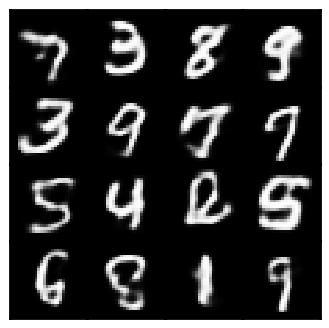

In [26]:
dbm2 = copy.deepcopy(dbm)

gibbs_steps = 1

V = dbm2.sample_v(n_gibbs_steps=gibbs_steps)

fig = plt.figure(figsize=(4, 4))
im_plot(V, shape=(28, 28), title='Samples generated by DBM after '+str(gibbs_steps) + ' Gibbs steps',
        imshow_params={'cmap': plt.cm.gray}, n_width=4, n_height=4)
plt.suptitle(None)
plt.savefig(FIGURE_PATH / "ex4_1_dbm_samples.pdf", bbox_inches='tight')